<a href="https://colab.research.google.com/github/dusrbrla-mbb/kubig-portfolio/blob/temp/al_co_re_final_churn_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Churn Prediction
* 데이터 셋 출처 : https://community.ibm.com/accelerators/?context=analytics&type=Data&product=Cognos%20Analytics

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/Study/Jupyter'
df = pd.read_csv(path + '/' + "WA_Fn-UseC_-Telco-Customer-Churn.csv")  # 원본 데이터도 한 번 살펴보기.
print(df.shape)
df.head().T

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(7043, 21)


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Business Understanding
##### 대상 분야 이해 - 통신사 고객관리(구독경제,  B2C 데이터)
* 통신사는 신규 고객 유치에 큰 공을 들임.
* 기존 고객 이탈 방지와 병행하여 진행.
* Churn - 고객 이탈(계약 해지) = 경쟁사로 이탈한다고 생각
* 고객 이탈과 가장 연관이 있는 요인(핵심 결정인자, determinent) 발굴
* 유사한 특성을 가진 고객들이 있다면, 이 고객들끼리 그룹으로 묶어  
각 그룹별 이탈률을 알아보고, 이탈률이 높은 그룹 포착시 집중 관리.

### Data Understanding
##### 데이터 이해 단계
* 고객 신상정보, 이용 서비스 내역 정보, 결제 정보

##### 1. 고객 정보
* customerID - 고객 식별정보
* gender - 성별정보
* Partner - 독신여부, Partner Yes 이면 독신 아님.
* SeniorCitizen - 연장자 여부
* dependents - 부양가족 유무
* tenure - 서비스 이용기간(이 값이 크면 장기이용고객), 정수값(월 단위)

##### 2. 이용 서비스(상품) 정보
* PhoneService - 전화 서비스 이용여부
* MultipleLines - 다중회선 이용여부(번호 여러개 이용하시는지)
* InternetService - 인터넷 서비스 이용여부, 이용시 종류
* OnlineSecurity - 보안 서비스 이용여부
* OnlineBackup - 정보 백업서비스 이용여부
* DeviceProtection - 단말기 보험 서비스 이용여부
* TechSupport - 기술지원 서비스 이용여부
* StreamingTV - 스트리밍 TV 서비스 이용여부
* StreamingMovies - 스트리밍 영화 서비스 이용여부

##### 3. 고객 결제정보
* Contract - 결제 갱신주기(매 월 / 1년마다 / 2년마다)
* PaymentMethod - 결제방식(온라인청구서, 지로통지 등)
* MonthlyCharges - 월 청구금액
* TotalCharges - 총 청구금액(계약기간동안 총 납부금액)

In [ ]:
df.describe() # 숫자컬럼들의 기초 통계량 확인
# TotalCharges 컬럼이 표기되지 않은 이유 -> 데이터 프레임을 읽을 때, 경우의 수로 인식한 것

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.sort_values(by='TotalCharges')['TotalCharges']  # 왜 경우의 수로 인식했는지 'TotalCharges' 컬럼을 정렬시킴

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
df.sort_values(by='TotalCharges')['TotalCharges'][936]
# 빈 칸이 띄어쓰기 한 칸으로 되어있음을 확인
# -> 이것 때문에 판다스에서 경우의 수 컬럼이라 취급한 것.

' '

##### 빈 값 처리법(null 값 처리)
1. 지운다
* 빈 값이 데이터 셋 중 극히 일부인 경우
2. 도메인 지식을 이용하여 채워넣는다(빈 값의 패턴을 파악)
* 수업에서 다루는 방법으로, 가장 유효한 일반적인 방법
3. 숫자라면 평균, 경우의 수라면 'other' 로 채워넣는다
* 숫자인 경우, 아주 좋지 않은 방법으로, 다른 방법들을 적용하기 어려운 경우에 마지막으로 시도하는 방법  
* 경우의 수인 경우, 나름대로 유효한 방법
4. 이 빈 값을 label 로 두고, 머신러닝 모델을 돌려서 predict 하여 채워넣는다.

In [ ]:
df.loc[df['TotalCharges'] == " "].T
# 빈 값의 공통점 -> 'tenure' 컬럼이 0 임을 확인.

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes


In [ ]:
df.loc[df['tenure'] == 0].T
# 'tenure' 컬럼이 0 인 고객들은 모두 'TotalCharges' 가 빈 값임을 확인.

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes


In [ ]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.loc[df['TotalCharges'] == ' ']['customerID']

488     4472-LVYGI
753     3115-CZMZD
936     5709-LVOEQ
1082    4367-NUYAO
1340    1371-DWPAZ
3331    7644-OMVMY
3826    3213-VVOLG
4380    2520-SGTTA
5218    2923-ARZLG
6670    4075-WKNIU
6754    2775-SEFEE
Name: customerID, dtype: object

In [ ]:
df.loc[df['TotalCharges'] == ' ']['customerID'].keys

<bound method Series.keys of 488     4472-LVYGI
753     3115-CZMZD
936     5709-LVOEQ
1082    4367-NUYAO
1340    1371-DWPAZ
3331    7644-OMVMY
3826    3213-VVOLG
4380    2520-SGTTA
5218    2923-ARZLG
6670    4075-WKNIU
6754    2775-SEFEE
Name: customerID, dtype: object>

In [ ]:
df.loc[df['TotalCharges'] == ' ']['customerID'].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
df.loc[df['TotalCharges'] == ' ']['customerID'].values

array(['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO',
       '1371-DWPAZ', '7644-OMVMY', '3213-VVOLG', '2520-SGTTA',
       '2923-ARZLG', '4075-WKNIU', '2775-SEFEE'], dtype=object)

In [ ]:
# 만약 빈 값이 너무 많다면 눈으로 확인하는 것이 아니라, 집합을 사용한다.
charge_null = df.loc[df['TotalCharges'] == " "]['customerID'].values
tenure_0 = df.loc[df['tenure'] == 0]['customerID'].values
len(set(charge_null).difference(set(tenure_0)))
# charge_null -> TotalCharges 가 빈 칸인 고객들의 customerID 모음
# tenure_0 -> tenure 가 0 인 고객들의 customerID 모음
# set() 으로 각 모음을 집합으로 변경.
# .difference 로 차집합 연산 수행 -> len() 으로 남아있는 개수 확인
# 차집합외에도 .intersection 으로 교집합 연산을 수행한 후, len() 값의 변화를 살펴봐도 된다.

0

In [ ]:
# 1. 무료 구독 기간이라고 가정하고, 0 을 대입한다.
# 2. 도메인 지식(일반적으로 1달안에 구독을 취소하지 않음)을 적용했을 때, 빈 값의 개수도 적으므로 지운다.

# 참고. 대부분의 상품이 월정액 기준인데, 아직 가입한 지 1달이 지나지 않아 전산 상에 반영되지 않았다는 점을 고려하면, 
# 넷플릭스처럼 한 달 사용료가 정해져 있는 경우, 한 달 사용료를 대입하고,
# 통신사 요금처럼 가입한 상품에 따라 금액이 달라지는 경우, 가입한 상품을 찾아 값을 대입한다.

In [ ]:
# 'TotalCharges' 컬럼의 빈 값인 row 처리 - 채워넣기 선택
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : float(x))  # 문자열이었던 컬럼을 숫자컬럼으로 변경.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df['Churn_number'] = df['Churn'].map({'Yes' : 1, 'No' : 0})
df.describe()
# Churn 컬럼에 대하여 Yes, No 를 1 과 0 으로 변환
# 전체 숫자 컬럼은 5개가 됨.
# 이때 Churn_number 컬럼의 평균값은 0과 1로만 구성되어 있고, 1 의 의미가 이탈 여부이므로, 이탈률을 의미함.

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_number
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


### Data Exploration
##### 데이터 탐색 단계
* Business Understanding 단계에서 파악 / 설정한 방향성과 직 / 간접적으로 부합하는 시각화 자료를 생성한다.

In [ ]:
# 컬럼이 22개인데 숫자컬럼은 5개밖에 없음
# 산점도를 그리는 작업은 x축과 y축이 숫자컬럼일 때 의미를 가짐
# 경우의 수 컬럼의 경우, hue 에만 적용 가능
# 그렇지만 이 데이터 셋에도, 산점도를 안 그리는 것은 아니며, 도메인 지식을 적용하여 축을 설정한다.
# 도메인 지식이 분명하지 않거나, 변수의 개수가 지나치게 많을 때는, 앞의 데이터 셋에서 했듯이 변수선택법을 적용한다.

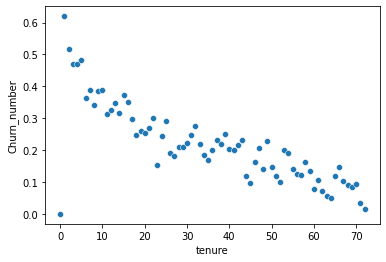

In [ ]:
import numpy as np
import seaborn as sns
te_df = df.groupby('tenure').agg({'Churn_number' : np.mean}).reset_index()
# 계약한지 n개월 되는 사람들끼리 그룹으로 묶어서 이탈률을 구한다.
sns.scatterplot(data=te_df, x='tenure', y='Churn_number')
# 계약기간이 길어질수록 이탈율이 감소한다는 단순한 인사이트(일단은 이 정도의 패턴만 뽑아내면 된다) 획득 가능.

# 참고로 기술통계 분야에서는, 구간을 나누어(ex. 12개월 기준),
# 12개월 이전까지는 "1달 증가할수록 이탈율이 ~% 감소한다." 등과 같은 세부적인 문장을 뽑아낸다.

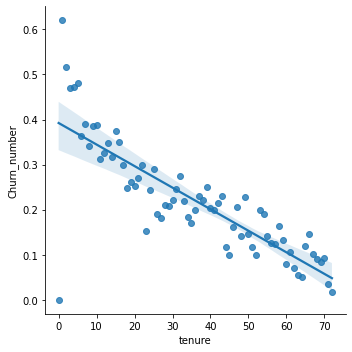

In [ ]:
sns.lmplot(data=te_df, x='tenure', y='Churn_number')
# 추세선 / 회귀선 개념을 이용하여 계약기간과 이탈률 시각화.

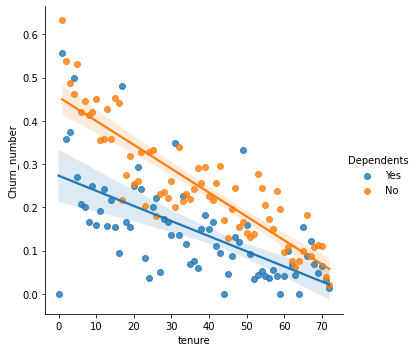

In [ ]:
hue = 'Dependents'
te_df = df.groupby(['tenure', hue]).agg({'Churn_number' : np.mean}).reset_index()
sns.lmplot(data=te_df, x='tenure', y='Churn_number', hue=hue)
# hue 기능을 이용하여 한 그래프에서 경우의 수들로 그래프 색에 정보 반영
# 부양가족이 있는 고객들은 이탈률이 전반적으로 더 낮음을 확인 가능.
# 이 갭(이탈률 차이)은 계약기간이 늘어날수록 줄어드는 경향성을 보임.

In [ ]:
df.describe(include='object')  # 경우의 수 컬럼만 추출하여 관련 통계량 도출

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
df.describe(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

> 연습. 위에 있는 많은 그래프에 대해 유효한 차이를 발견하고, 각 그래프를 설명하는 문장을 만들어 보기.

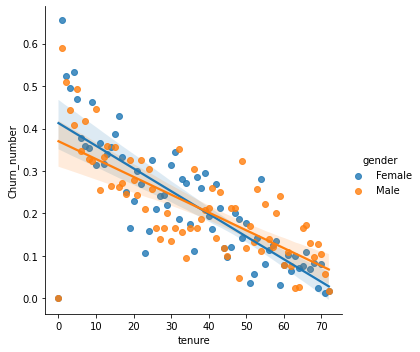

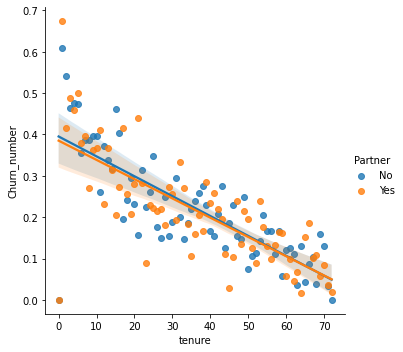

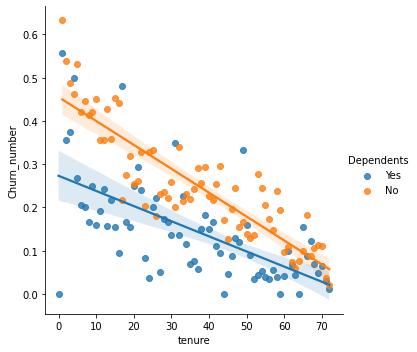

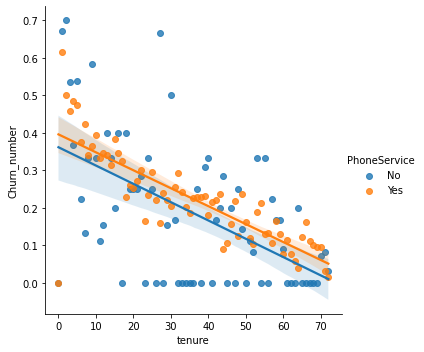

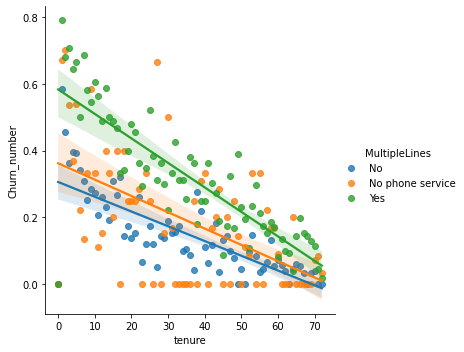

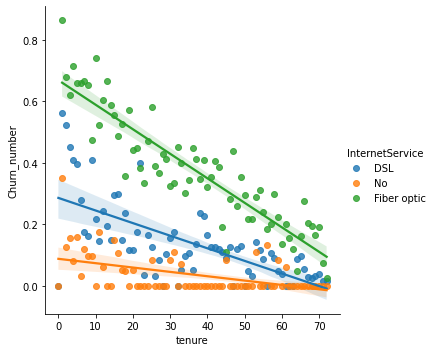

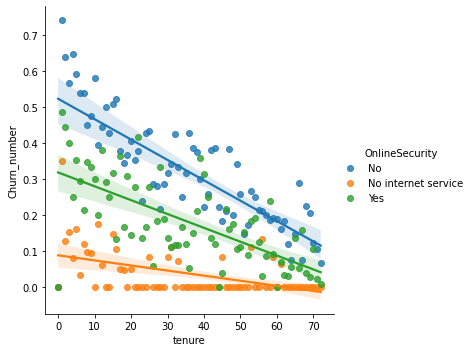

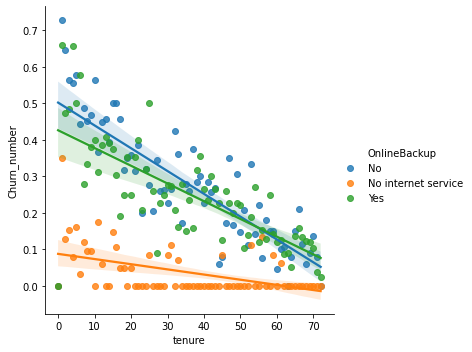

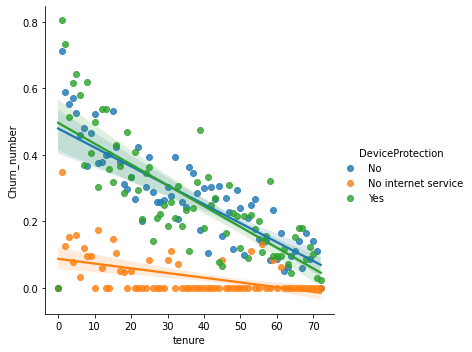

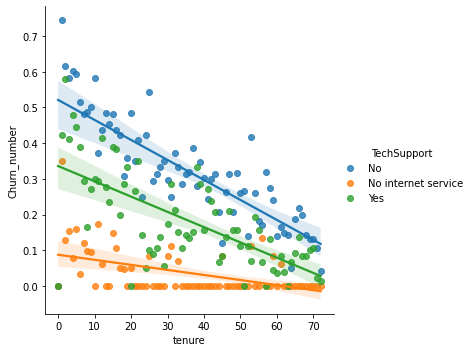

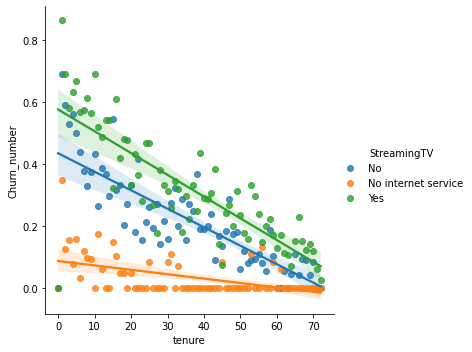

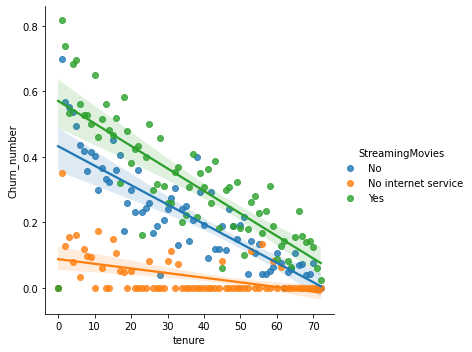

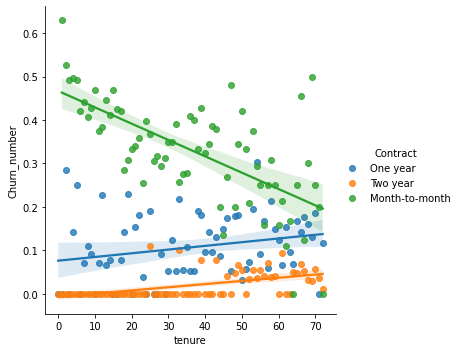

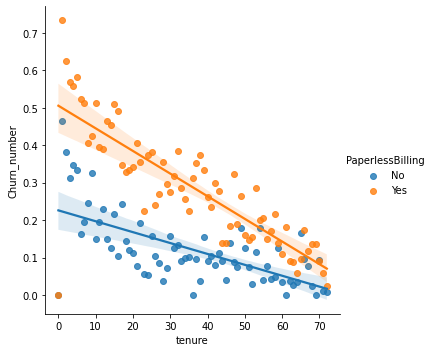

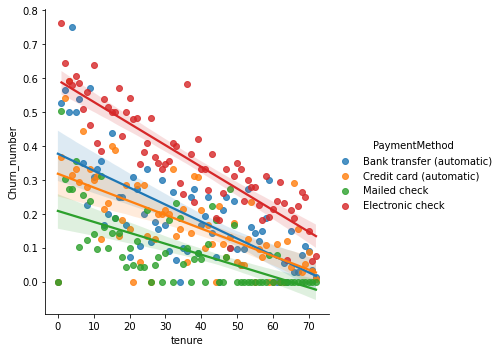

In [ ]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']
for hue in cat_cols:  # 위에 있는 모든 hue 변수 후보들의 그래프 생성
    te_df = df.groupby(['tenure', hue]).agg({'Churn_number' : np.mean}).reset_index()
    sns.lmplot(data=te_df, x='tenure', y='Churn_number', hue=hue)

In [ ]:
# 1. Dependents(부양가족)
# 부양가족의 유무는 '통화 이용량의 증가'와 '가족 이용 할인'과 관련이 있다.
# 따라서 부양가족이 있다면 통화 이용량이 늘고 가족 할인이 존재하기 때문에 가입 해지율이 줄어든다고 유추할 수 있다.
# 2. MultipleLines(다중회선)
# 다중회선 이용 유무는 해당 서비스 외에 사용할 수 있는 또다른 서비스를 쉽게 갈아탈 수 있다.
# 따라서 다른 서비스를 동시에 사용하여 이탈의 진입장벽이 낮을수록 해지율이 높다고 유추할 수 있다.
# 3. InternetService(인터넷)
# 인터넷 서비스를 사용하지 않을 경우, 필수적으로 통신 서비스를 사용해야 하므로 가장 낮은 해지율을 보인다.
# 한편, 전화 서비스를 함께 사용할 수 있는 DSL에 비해, 광섬유는 전화를 함께 사용할 수 없기 때문에
# 추가 비용이 더 들어가므로 해지율이 더 높다고 유추할 수 있다.
# 4. OnlineSecurity(보안)
# 인터넷 서비스는 위와 동일한 이유로 생각할 수 있다.
# 보안 서비스를 사용할 경우, 통신망이 안전해지므로 전화 서비스를 사용할 가능성이 높아진다고 유추할 수 있다.
# 5. TechSupport(기술지원)
# 기술지원 서비스를 이용할 경우, 해당 서비스에 더 많은 돈을 사용했으므로, 해지율이 낮을 것이라고 유추할 수 있다.
# 6. StreamingTV(TV)
# 스트리밍 TV 서비스를 사용하는 사람들은 통신의 목적보다 TV 서비스를 사용하고자 하는 목적이 더 크기 때문에,
# 통신 서비스의 품질과 상관없이, TV 서비스의 질에 따라 다른 서비스를 이용할 가능성이 높다고 유추할 수 있다.
# 7. StreamingMovies(영화)
# TV와 같은 이유
# 8. Contract(결제주기)
# 먼저, 매월마다 결제를 하는 사람들의 경우, 결제 자체를 매월마다 고민하게 되므로 다른 서비스와 비교를 더 자주 하게 된다.
# 따라서 가입해지율이 더 높고, 특이하게 결제주기가 긴 사람들은,
# 결제 취소를 도중에 할 수 없으므로 결제주기가 끝난 후에 몰아서 실행하기 때문에 가입기간이 늘어날수록 해지율이 높아진다고 할 수 있다.
# 9. PaperlessBilling(카드여부)
# 카드 결제의 경우, 현금 결제에 비해 가입과 해지가 편리하므로, 해지를 더 편하게 고려할 수 있기 때문이다.
# 10. PaymentMethod(결제방식)
# mailed check 의 경우, 위와 마찬가지로 해지하기가 상대적으로 불편하기 때문에 그대로 유지할 가능성이 높다고 유추할 수 있다.
# 또, 자동 결제에 비해 전자 수표 방식은 해지는 비슷한 수준으로 편하지만,
# 매 결제마다 금액을 확인하게 되므로, 자동 결제에 비해 금액적인 면을 더 고려하게 되어 해지할 가능성이 높아진다고 유추할 수 있다.

##### 고객정보 기반
* 성별 : 차이 발견되지 않음
* 독신여부 : 차이 발견되지 않음
* 부양가족 여부 : 부양가족이 없을 때 이탈률이 높음

##### 서비스 종류 기반
1. 돈을 더 낼수록 이탈률 높아짐
    * 다중회선 사용고객의 경우 이탈률이 높음
    * 인터넷 서비스 이용시 인터넷 속도가 높을수록 이탈률이 높음
    * 스트리밍 TV, 영화 서비스는 받는 경우 이탈률이 더 높음  


2. 돈을 안 낼수록 이탈률 높아짐 -> 이런 유형의 서비스는 추천
    * 보안 서비스 이용을 하지 않을수록 이탈률이 더 높음
    * 기술지원 서비스를 받지 않을수록 이탈률이 더 높음

~~전화 서비스 여부에 따른 차이는 발견되지 않음~~  
~~데이터 백업 서비스, 기기 보호 서비스는 차이가 발생하지 않음~~

##### 계약 정보 기반
* 갱신주기가 길어질수록 이탈률이 낮음
* 갱신주기가 년으로 긴 경우에는 기간이 길어질수록 이탈률이 높아짐.
* 청구서 형태의 경우 paperless(통지서 x) 이탈률이 높음
* 결제방식의 경우,  
[high] 전자통지서(이메일 / 문자)가 가장 이탈률이 높았고,  
[mid] 자동결제(은행 연동)의 경우 중간 정도의 이탈률을 보임.  
[low] 지로통지서(우편)가 가장 낮음.  
    * low -> mid -> high : 기술발전 순
    * high : 이탈(해지)이 쉽고, 젊은 층이 주로 사용

### Data Preparation
##### 데이터 준비 단계
* 이상치 판별 / 처리
* 스케일링
* 경우의 수 컬럼의 숫자 변환
* train / test split

### 이상치 -> 이상한 수치
##### Outlier(아웃라이어)
##### 데이터 상 기준을 정하여, 기준점을 넘어가면 이상치라 한다.
* IQR - Inter Quartile Range - 알코
* MAD - Median Absolute Deviation - 최신
* MCOD - Monte-Carto Outlier Detection - 최신
* Hotelling's T2 & SPE - 수업 X, PCA 기반 PLS 알고리즘 활용

##### 식별된 이상치가 있는 경우 대처방법 :
1. 지운다(식별된 경우이므로, OK)
2. 경계선(범위)의 값으로 대체한다(Winsorize)
3. Business Understanding 단계에서 이상치를 Label 로 삼는 경우, 특별 관리  
 -> ex. 롯데백화점은 연 1억 누적결제시 VVIP 등급(LENITH) 으로 특별관리대상.  
 -> 파레토 법칙(분포: 일부 상위권이 다수를 차지함)과 관련된 사례

### IQR 방식 - Inter Quartile Range
##### Inter - a 와 b '사이'
##### Quartile - 크기 순 정렬시, 순서상 25% 순위와 75% 순위(describe에 있음)
##### Range - 범위

In [ ]:
df.describe().T['75%'] # 데이터프레임을 전치시키면 '25%'와 '75%'는 컬럼이 됨.

SeniorCitizen        0.00
tenure              55.00
MonthlyCharges      89.85
TotalCharges      3786.60
Churn_number         1.00
Name: 75%, dtype: float64

In [ ]:
(df.describe().T['75%'] - df.describe().T['25%']) * 1.5 # 본 데이터의 숫자컬럼(현재는 행)의 range를 구함.

SeniorCitizen        0.000
tenure              69.000
MonthlyCharges      81.525
TotalCharges      5082.075
Churn_number         1.500
dtype: float64

In [ ]:
# 위의 결과를 활용하여 각 숫자 컬럼에서의 이상치 탐지
up_lim = df.describe().T['75%']['TotalCharges'] + 5082.075 # 위 울타리
low_lim = df.describe().T['25%']['TotalCharges'] - 5082.075 # 아래 울타리
df.loc[(df['TotalCharges'] > up_lim) + (df['TotalCharges'] < low_lim)]
# TotalCharges 컬럼에 대하여, IQR 방식으로 이상치 확인 시, 판별되지 않았다.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_number


##### Scaling - 변수의 범위를 조정해주는 것
* 어떤 컬럼은 소수점 둘째자리, 어떤 컬럼은 1000의 자리이면?
* 알고리즘 종류(ex. 내부에 선형회귀 계산식 존재)에 따라,  
단위가 큰 컬럼이 단위가 작은 컬럼에 비해(중요도와 상관없이), 내부에 미치는 영향이 큰 경우  
 -> 이 영향을 최소화하기 위해 준비단계에서 이용.
* 그래프 그릴 때, 차후 해석을 위해 같은 축을 공유해 시각화하는 경우(단위는 A.U(arbitrary unit) -> scaling 후에는 단위 중요 X)
* 알고리즘 종류에 따라서 자릿수가 적어야 속도가 빠른 경우(ex. SVM)
* 보통 3 가지 종류가 있음.
* min-max, standard, robust
    * min-max(알코) -> 컬럼의 최소 / 최대값을 0 과 1로 맞춰줌. -> 모든 값이 0 과 1 사이.
    * standard(최신) -> 평균을 0으로, 표준편차를 1로 맞춤.
    * robust(최신) -> 중간값(50% 지점)을 0으로, IQR 을 1로 맞춤

##### min-max scaling -> 최솟값을 0 으로 만들고, 최댓값을 1 로 만든다.
* 0 * ? = 0, 0 / ? = 0 이용 -> 불변
* a / a = 1 이용
* 최솟값을 0으로 만든 후(모든 값에 대해 최솟값으로 뺀다), 최댓값으로 나누어 1로 만든다.

In [ ]:
scal_cols = ['TotalCharges', 'tenure', 'MonthlyCharges'] # 스케일링 대상 컬럼
target_col = df[scal_cols[0]] # 여기서는 'TotalCharges' 컬럼
minus_min = target_col - target_col.min()
df[scal_cols[0] + '_min_max'] = minus_min / minus_min.max()
# df에 'TotalCharges' 컬럼에 min-max 스케일링 적용한 'TotalCharges_min_max' 컬럼 생성
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_number,TotalCharges_min_max
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.262497
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.261007
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.045891
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.160574
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.436003
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000


In [ ]:
scal_cols = ['TotalCharges', 'tenure', 'MonthlyCharges']
for scal_col in scal_cols:
    target_col = df[scal_col]
    minus_min = target_col - target_col.min()
    df[scal_col + '_min_max'] = minus_min / minus_min.max()
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_number,TotalCharges_min_max,tenure_min_max,MonthlyCharges_min_max
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.262497,0.449599,0.462803
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.261007,0.341104,0.299403
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.045891,0.125000,0.171642
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.160574,0.402778,0.518408
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.436003,0.763889,0.712438
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


##### 경우의 수 컬럼 숫자로 변환
* 2가지 경우이면 0 과 1 로 변환
* 3가지 이상의 경우이면 도메인 지식 적용하여 변환 시도

In [ ]:
mapper = {'Female' : 0, 'Male' : 1}
# 어느 경우를 1 로 둘지는 자유이지만, 어떤 것인지 기억해야 함.
df['gender_num'] = df['gender'].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_number,TotalCharges_min_max,tenure_min_max,MonthlyCharges_min_max,gender_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.262497,0.449599,0.462803,0.504756
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.261007,0.341104,0.299403,0.500013
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.045891,0.125000,0.171642,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.160574,0.402778,0.518408,1.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.436003,0.763889,0.712438,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in yes_no_cols:
    mapper = {'No' : 0, 'Yes' : 1}
    df[col + '_num'] = df[col].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_number,TotalCharges_min_max,tenure_min_max,MonthlyCharges_min_max,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.262497,0.449599,0.462803,0.504756,0.483033,0.299588,0.903166,0.592219
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.261007,0.341104,0.299403,0.500013,0.499748,0.458110,0.295752,0.491457
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.045891,0.125000,0.171642,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.160574,0.402778,0.518408,1.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.436003,0.763889,0.712438,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
np.unique(df['InternetService'])

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
mapper = {'No' : 0, 'DSL' : 0.5, 'Fiber optic' : 1}
# 인터넷 속도라는 '정도의 차이'가 발생하므로, label encoding 과 같은 방식으로 숫자로 변환할 수 있다.
df['InternetSpeed'] = df['InternetService'].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_number,TotalCharges_min_max,tenure_min_max,MonthlyCharges_min_max,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.262497,0.449599,0.462803,0.504756,0.483033,0.299588,0.903166,0.592219,0.611458
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.261007,0.341104,0.299403,0.500013,0.499748,0.458110,0.295752,0.491457,0.389438
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.045891,0.125000,0.171642,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.160574,0.402778,0.518408,1.000000,0.000000,0.000000,1.000000,1.000000,0.500000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.436003,0.763889,0.712438,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### train / test split

In [ ]:
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn_number', 'TotalCharges_min_max', 'tenure_min_max',
       'MonthlyCharges_min_max', 'gender_num', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed'],
      dtype='object')

In [ ]:
# 복습
df.describe(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
label = 'Churn_number'
features = ['SeniorCitizen', 'TotalCharges_min_max', 'tenure_min_max',
            'MonthlyCharges_min_max', 'gender_num', 'Partner_num', 'Dependents_num',
            'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']
train, test = df[0::2], df[1::2]  # 홀/짝 기준으로 공부용/시험용 분할(row 분리)
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]
# 문제와 정답 분리(column 분리)

**참고. 단계별 상대적 중요도**
* 전체 단계 중에서 [비즈니스 이해 ~ 데이터 탐색] 은 지난 시간과 전혀 다름.
* 특히, 앞 단계일수록 분야마다 큰 차이를 보임.
* 단, 데이터 준비 단계는 약간 달라지고(복붙은 가능해도 약간의 조정 필요),
* [모델 기획 & 모델 구축] 은 사실상 동일함.

즉, 앞 단계를 잘해놓아야, 뒷내용의 의미가 생김.

In [ ]:
# 지난 시간 코드 복붙 1
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb
m1, m2, m3 = dt(), rf(), gb()
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)
r1 = pd.DataFrame(m1.predict_proba(X_test), columns=['negative', 'positive'])
r2 = pd.DataFrame(m2.predict_proba(X_test), columns=['negative', 'positive'])
r3 = pd.DataFrame(m3.predict_proba(X_test), columns=['negative', 'positive'])

In [ ]:
m2.predict_proba(X_test) # 지난 시간 복습

array([[0.91, 0.09],
       [0.98, 0.02],
       [0.33, 0.67],
       ...,
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.13, 0.87]])

In [ ]:
pd.DataFrame(m2.predict_proba(X_test), columns=['negative', 'positive']) # 0과 1 순서로 정해져 있음.

,negative,positive
0,0.91,0.09
1,0.98,0.02
2,0.33,0.67
3,0.62,0.38
4,0.99,0.01
...,...,...
3516,0.78,0.22
3517,0.37,0.63
3518,1.00,0.00
3519,0.97,0.03


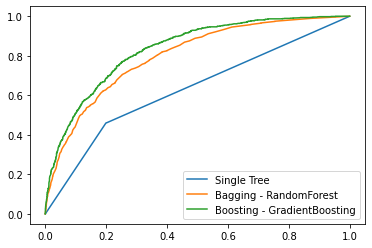

In [ ]:
# 지난 시간 코드 복붙 2
## roc_curve()에 대해서는 al_co_56 참고
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
x1, y1, _ = roc_curve(y_test, r1['positive'])
x2, y2, _ = roc_curve(y_test, r2['positive'])
x3, y3, _ = roc_curve(y_test, r3['positive'])
plt.plot(x1, y1, label='Single Tree')
plt.plot(x2, y2, label='Bagging - RandomForest')
plt.plot(x3, y3, label='Boosting - GradientBoosting')
plt.legend()

##### 지도학습과 비지도학습
* 목적에 따라 알고리즘을 나눌 수 있다.  
 -> label 이 있으면(채점이 가능하면) 지도학습
* 지도학습은 feature - label 관계 패턴을 학습.
* 비지도학습은 label 이 없고, feature 간 관계 패턴을 학습.
* 비지도학습 알고리즘들은 알고리즘에 따라 목적이 정해져 있음(약간씩 다를 수 있음)  
 -> 참고. 비지도학습 알고리즘을 활용하여, 지도학습의 점수를 올리는 방식도 있음(수준 高)
* 지금 다룰 것은 군집 알고리즘 -> 유사한 row 끼리 그룹화

In [ ]:
# 지금까지는 회귀이든 분류이든 지도학습이었으나,
# 이번 데이터 셋의 Business Understanding 에서 설정한 목표는 비지도학습(유사한 특성을 가진 고객들 간 그룹 형성)도 활용해야 한다.

In [ ]:
from sklearn.cluster import KMeans
# 군집 알고리즘 적용시, 일반적으로는 스케일링을 해야 함.
# 선형회귀식이 들어있는 것은 아니지만, 거리를 구하는 식이 존재하기 때문에, 스케일링 필요!
features = ['TotalCharges_min_max', 'tenure_min_max', 'MonthlyCharges_min_max']
model = KMeans(n_clusters=4)
model.fit(df[features])
# 'n_clusters=8' 이라고 디폴트 값은 정해져 있으나, 그룹의 개수를 직접 정해주어야 함.
# 그룹의 숫자를 알아서 결정해주는 알고리즘 또한 존재하긴 함.

KMeans(n_clusters=4)

In [ ]:
model.labels_ # 각 row 가 어떤 그룹에 속하는지를 model 이 학습한 결과

array([0, 3, 0, ..., 0, 2, 1], dtype=int32)

In [ ]:
df['cluster'] = model.labels_
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges_min_max,tenure_min_max,MonthlyCharges_min_max,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0.003437,0.013889,0.115423,0,1,0,0,1,0.5,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0.217564,0.472222,0.385075,1,0,0,1,0,0.5,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0.012453,0.027778,0.354229,1,0,0,1,1,0.5,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0.211951,0.625000,0.239303,1,0,0,0,0,0.5,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0.017462,0.027778,0.521891,0,0,0,1,1,1.0,2


In [ ]:
df.groupby('cluster').agg({'Churn_number' : np.mean})
# KMeans 알고리즘은 내부적으로 랜덤 프로세스가 존재함.
# 4개의 점을 찍은 뒤, 가장 가까운 중심으로 모으기 때문에 cluster 에 따른 이탈률은 달라질 수 있으나,
# 경향성(5%, 15%, 25%, 48%)은 유사함.

,Churn_number
cluster,
0,0.247642
1,0.153846
2,0.483017
3,0.050173


In [ ]:
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn_number', 'TotalCharges_min_max', 'tenure_min_max',
       'MonthlyCharges_min_max', 'gender_num', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed', 'cluster'],
      dtype='object')

In [ ]:
features = ['SeniorCitizen', 'Churn_number', 'TotalCharges_min_max', 'tenure_min_max',
            'MonthlyCharges_min_max', 'gender_num', 'Partner_num', 'Dependents_num',
            'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']
df.loc[df['cluster'] == 2] # 알고리즘 실행 시마다 변하지만 현재는 2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges_min_max,tenure_min_max,MonthlyCharges_min_max,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed,cluster
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0.017462,0.027778,0.521891,0,0,0,1,1,1.0,2
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,0.094475,0.111111,0.809950,0,0,0,1,1,1.0,2
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,0.224461,0.305556,0.704975,1,0,1,1,1,1.0,2
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,0.350733,0.388889,0.861194,0,1,0,1,1,1.0,2
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,0.309282,0.347222,0.868159,1,0,0,1,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,0.302281,0.527778,0.509950,1,0,0,1,1,1.0,2
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,0.172151,0.263889,0.601493,1,0,0,1,1,1.0,2
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,0.085586,0.166667,0.421891,0,0,0,0,0,0.5,2
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,0.229194,0.333333,0.662189,1,1,1,1,1,0.5,2


In [ ]:
df.loc[df['cluster'] == 2][features]

,SeniorCitizen,Churn_number,TotalCharges_min_max,tenure_min_max,MonthlyCharges_min_max,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
4,0,1,0.017462,0.027778,0.521891,0,0,0,1,1,1.0
5,0,1,0.094475,0.111111,0.809950,0,0,0,1,1,1.0
6,0,0,0.224461,0.305556,0.704975,1,0,1,1,1,1.0
8,0,1,0.350733,0.388889,0.861194,0,1,0,1,1,1.0
14,0,0,0.309282,0.347222,0.868159,1,0,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7033,0,0,0.302281,0.527778,0.509950,1,0,0,1,1,1.0
7035,0,0,0.172151,0.263889,0.601493,1,0,0,1,1,1.0
7036,0,0,0.085586,0.166667,0.421891,0,0,0,0,0,0.5
7038,0,0,0.229194,0.333333,0.662189,1,1,1,1,1,0.5


In [ ]:
df.loc[df['cluster'] == 2][features].describe()

,SeniorCitizen,Churn_number,TotalCharges_min_max,tenure_min_max,MonthlyCharges_min_max,gender_num,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
count,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000
mean,0.227614,0.483017,0.143042,0.212561,0.622333,0.498015,0.366123,0.198941,0.991178,0.722100,0.885090
std,0.419384,0.499822,0.109126,0.156170,0.126152,0.500106,0.481850,0.399292,0.093532,0.448063,0.210405
min,0.000000,0.000000,0.000000,0.000000,0.327861,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,0.000000,0.000000,0.042655,0.069444,0.522886,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,0.126117,0.194444,0.614925,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,0.225307,0.347222,0.715423,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,0.415438,0.569444,0.942289,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.loc[df['cluster'] == 2][features].describe().T['mean']

SeniorCitizen             0.227614
Churn_number              0.483017
TotalCharges_min_max      0.143042
tenure_min_max            0.212561
MonthlyCharges_min_max    0.622333
gender_num                0.498015
Partner_num               0.366123
Dependents_num            0.198941
PhoneService_num          0.991178
PaperlessBilling_num      0.722100
InternetSpeed             0.885090
Name: mean, dtype: float64

In [ ]:
features = ['SeniorCitizen', 'Churn_number', 'TotalCharges_min_max', 'tenure_min_max',
            'MonthlyCharges_min_max', 'gender_num', 'Partner_num', 'Dependents_num',
            'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']
for_plot = df.loc[df['cluster'] == 2][features].describe().T['mean'].reset_index()
# 이탈률이 높은 사람들을 필터링하여 따로 선택한 후,
# 관심있는 컬럼들(숫자컬럼)을 선택, 컬럼들의 평균값을 이용하여,
# 해당 그룹의 특징 도출 -> 이를 cluster_mean(그룹의 평균) 이라 함.
for_plot

,index,mean
0,SeniorCitizen,0.227614
1,Churn_number,0.483017
2,TotalCharges_min_max,0.143042
3,tenure_min_max,0.212561
4,MonthlyCharges_min_max,0.622333
5,gender_num,0.498015
6,Partner_num,0.366123
7,Dependents_num,0.198941
8,PhoneService_num,0.991178
9,PaperlessBilling_num,0.722100


In [ ]:
# 이탈률 높은 그룹의 특징 :
# Dependents -> 부양가족 없는 비율 높음
# InternetSpeed -> 인터넷 광랜 이용자 다수

# 만약 위의 결과와 데이터 탐색 단계에서의 그래프로부터 도출한 문장이 서로 맞지 않다면,
# 다시 돌아가서 확인해야 함(오류 발생의 가능성)

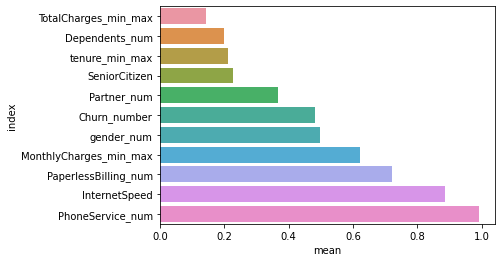

In [ ]:
import seaborn as sns
sns.barplot(data=for_plot.sort_values(by='mean'), x='mean', y='index')
# 경우의 수 컬럼을 제외한 숫자컬럼들만으로도 지도학습에서의 패턴과 유사한 결과를 이끌어냄.
## 지난번과 마찬가지로 for_plot 자체보다는 정렬된 상태를 사용해야 시인성 높아짐
## x축과 y축 역시 일반적인 선택은 아니지만 index가 중복되는 것을 막기 위함

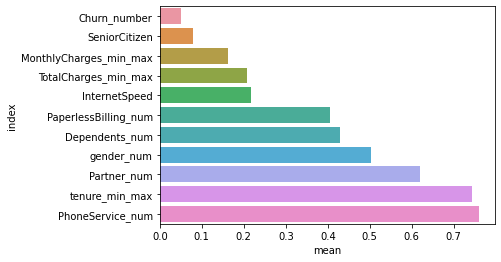

In [ ]:
for_plot_new = df.loc[df['cluster'] == 3][features].describe().T['mean'].reset_index() # 이탈률 낮은 그룹
sns.barplot(data=for_plot_new.sort_values(by='mean'), x='mean', y='index')

### 차원 축소 - 변수의 개수 줄이기(feature 개수)
##### 대표적으로 PCA(주성분분석, Principal Component Analysis)
* feature selection 개념과는 완전히 다른 이야기.
* 만약 원본 데이터에 1000개의 컬럼이 있다면,  
이 데이터의 정보를 전부(100%) 표현하기 위해서는 1000개의 컬럼이 필요하다.
* 이때 차원 축소 기법을 이용하면, 단 몇 개 수준으로 80 ~ 90% 이상의 정보 표현 가능.
* 1000개 중 중요한 몇 개를 선별해서 사용한다는 개념이 아니라,  
1000개를 **조금씩 조합하여 새로운 feature 를 몇 개 만들겠다**는 것.
* 데이터 안의 정보를 최대한 유지하면서 컬럼 개수가 1000 -> ? 개로 줄어든다.

### 식당의 식재료를 컬럼이라고 생각했을 때의 PCA 해석
##### 식재료가 100개 있고, 주문받아 음식을 만들 때, 각 식재료를 얼마나 사용했는가를 데이터 프레임으로 만들었다고 가정.
##### 한 번 주문받은 것을 한 row 라 생각하고, 사용된 식재료들을 column 이라 생각.
* 만약 전체 주문의 99% 가 베스트셀러 메뉴 3개라면, 메뉴 3개만으로 99% 데이터 설명 가능.
* 총 100개의 식재료 컬럼으로 이루어진 데이터 프레임이, 메뉴 컬럼 3개만으로 99% 정보 설명 가능(100 -> 3).
* 이때, 베스트 메뉴 3개에 필요한 재료는 따로 저장하여, 나중에 고려하면 됨.

In [ ]:
from sklearn.decomposition import PCA
features = ['TotalCharges_min_max', 'tenure_min_max', 'MonthlyCharges_min_max']
model = PCA(n_components=2)
model.fit_transform(df[features])

array([[-0.60244755,  0.04916774],
       [-0.04497465,  0.07852098],
       [-0.48156688, -0.13993128],
       ...,
       [-0.48735087,  0.12847271],
       [-0.35844862, -0.29342902],
       [ 0.80414311, -0.09053842]])

In [ ]:
pd.DataFrame(model.fit_transform(df[features]), columns=['PC1', 'PC2'])

,PC1,PC2
0,-0.602448,0.049168
1,-0.044975,0.078521
2,-0.481567,-0.139931
3,-0.008327,0.285267
4,-0.404143,-0.278166
...,...,...
7038,-0.010245,-0.228730
7039,0.884845,-0.025555
7040,-0.487351,0.128473
7041,-0.358449,-0.293429


In [ ]:
from sklearn.decomposition import PCA
features = ['TotalCharges_min_max', 'tenure_min_max', 'MonthlyCharges_min_max']
model = PCA(n_components=2)  # feature 개수보다 적어야 함(축소이기 때문에)
PC = pd.DataFrame(model.fit_transform(df[features]), columns=['PC1', 'PC2'])
PC[label] = df[label]
PC.head()

,PC1,PC2,Churn_number
0,-0.602448,0.049168,0
1,-0.044975,0.078521,0
2,-0.481567,-0.139931,1
3,-0.008327,0.285267,0
4,-0.404143,-0.278166,1


In [ ]:
model.components_  # (베스트 메뉴를 이루고 있는) 주성분(재료), 가로 방향은 재료(컬럼) 3개, 세로는 베스트 메뉴(그룹) 2개

array([[ 0.57690858,  0.68523564,  0.44455438],
       [-0.03813027,  0.5662574 , -0.823346  ]])

In [ ]:
pd.DataFrame(model.components_, columns=features)
# 데이터 프레임에 들어있는 값이,
# 베스트 메뉴를 구성하는데 각 재료가 얼마나 사용되었나? 이다.

,TotalCharges_min_max,tenure_min_max,MonthlyCharges_min_max
0,0.576909,0.685236,0.444554
1,-0.038130,0.566257,-0.823346


### 그룹 지을 때, 군집의 개수를 지정하는 방법
##### 감으로, 평가지표로, 그래프로
* 감으로 -> 군집의 개수를 미리 알고 있는 경우
* 평가지표(비지도학습)로 -> 실루엣 지표 등 이상적인 그룹과, 그렇지 않은 그룹일 때의 수치값 비교가 가능한 평가지표 이용.
    * 동일한 군집 안에서는 밀집해 있고, 다른 군집 간에는 아주 멀리 떨어진 경우, 평가지표가 높음.
* 그래프 그려서 눈으로 -> scree plot / elbow method 라 부름.
    * elbow(팔꿈치) 모양이 생기는 지점 확인.

In [ ]:
from sklearn.metrics import silhouette_score as sil
features = ['TotalCharges_min_max', 'tenure_min_max', 'MonthlyCharges_min_max']
model = KMeans(n_clusters=4)
model.fit(df[features]) # 비지도학습이므로 feature / label 구별이 불필요하며, feature들만 입력.
sil_score = sil(df[features], model.labels_) # sil()에는 X와 label 등 필요.
print(sil_score)
# 실루엣은 -1 ~ 1 이고, 1에 가까울수록 좋다.
# n_cluster 를 바꿔가면서 수치 값 달라지는 것 확인(3 ~ 6) -> 4가 가장 좋음.

0.46986986245723683


In [ ]:
model.inertia_

380.98250310086274

In [ ]:
from sklearn.metrics import silhouette_score as sil
features = ['TotalCharges_min_max', 'tenure_min_max', 'MonthlyCharges_min_max']
model = KMeans(n_clusters=3)
model.fit(df[features])
sil_score = sil(df[features], model.labels_)
elbow_score = model.inertia_
print(elbow_score)
# 군집 개수가 달라지면 elbow_score 또한 달라짐을 확인.

596.7066400475846


In [ ]:
from sklearn.metrics import silhouette_score as sil
features = ['TotalCharges_min_max', 'tenure_min_max', 'MonthlyCharges_min_max']
score_list = []
for i in range(10):
    i = i + 2
    model = KMeans(n_clusters=i)  # 군집 개수를 점점 증가시킴
    model.fit(df[features])
    sil_score = sil(df[features], model.labels_)
    elbow_score = model.inertia_  # 군집 개수에 따라 평가지표 값 도출
    score_dict = {'num_cluster' : i, 'sil' : sil_score, 'elbow' : elbow_score}
    score_list.append(score_dict)  # 군집 개수에 딸 평가지표 값들을 모음
score_df = pd.DataFrame(score_list)  # 데이터 프레임으로 바꿈.
# 참고로, 기술통계 분야는 R 프로그램이 더 유효함.
# nbclust 활용해보기

In [ ]:
score_df.sort_values(by='sil', ascending=False)
# 실루엣 기준으로 4 가 가장 높은 점수를 받음.
# 그러나, 2등이나 나머지와 큰 차이를 보이지도 않고, 1에 가깝지도 않음 -> 이상적인 군집은 아님.

,num_cluster,sil,elbow
2,4,0.469868,380.982469
0,2,0.464345,918.692968
3,5,0.446418,289.830619
1,3,0.445404,596.706618
8,10,0.436180,130.974008
4,6,0.435189,240.441193
9,11,0.427350,116.564535
7,9,0.424000,151.778698
5,7,0.423134,206.156573
6,8,0.419983,177.996001


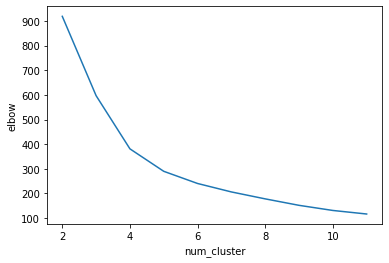

In [ ]:
sns.lineplot(data=score_df, x='num_cluster', y='elbow')
# 기울기의 변화가 가장 큰 지점(가장 크게 꺾이는 지점)이 최적 군집 개수.
# 현재 명확하지는 않지만, 약 4 지점에서 큰 꺾임이 있음을 확인 가능.
# 이상적인 군집에 가까울수록 다른 범위에서는 직선에 가깝고, 한 지점에서만 크게 꺾임.

##### PCA 수학적 설명?
* 컬럼끼리 공분산 구해서 공분산 행렬을 구합니다. - df[features].cov()
* 공분산 행렬은 가로 세로 길이가 같은 정방행렬(square matrix)
* 고유값, 고유벡터를 정방행렬에서 뽑아낼 수 있습니다.
* 고유값(eigen value) 의 크기 순으로 정렬할 수 있습니다.
* 크기가 가장 큰 고유값부터 정렬하면 순서를 갖습니다.
* 고유값과 고유벡터는 한 쌍으로 있습니다.
* 고유벡터 크기가 큰 것부터 작은 것 순서대로 PC1, PC2, PC3, ... 으로 이름을 붙입니다.